In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

数据形状: X = torch.Size([100, 1]), Y = torch.Size([100, 1])
真实参数: a = 2.0, b = -1.5, c = 3.0


/home/rhs/miniconda3/envs/RL/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rhs/miniconda3/envs/RL/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rhs/miniconda3/envs/RL/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rhs/miniconda3/envs/RL/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rhs/miniconda3/envs/RL/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: G

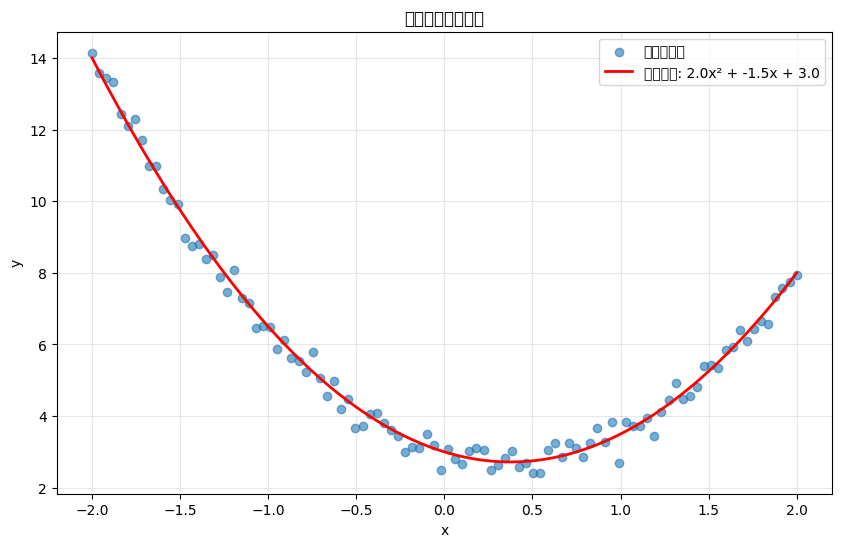

In [2]:
# 设置随机种子以确保结果可复现
np.random.seed(42)
torch.manual_seed(42)

# 生成二次函数数据 y = ax^2 + bx + c + noise
n_samples = 100
x = np.linspace(-2, 2, n_samples)
true_a, true_b, true_c = 2.0, -1.5, 3.0  # 真实参数
noise = 0.3 * np.random.randn(n_samples)
y = true_a * x**2 + true_b * x + true_c + noise

# 转换为PyTorch张量
X = torch.tensor(x, dtype=torch.float32).reshape(-1, 1)
Y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

print(f"数据形状: X = {X.shape}, Y = {Y.shape}")
print(f"真实参数: a = {true_a}, b = {true_b}, c = {true_c}")

# 可视化原始数据
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='带噪声数据')
plt.plot(x, true_a * x**2 + true_b * x + true_c, 'r-', linewidth=2, label=f'真实函数: {true_a}x² + {true_b}x + {true_c}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('二次函数回归数据')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
# 定义二次函数回归模型
class QuadraticRegression(torch.nn.Module):
    def __init__(self):
        super(QuadraticRegression, self).__init__()
        # 初始化参数 a, b, c
        self.a = torch.nn.Parameter(torch.randn(1, requires_grad=True))
        self.b = torch.nn.Parameter(torch.randn(1, requires_grad=True))
        self.c = torch.nn.Parameter(torch.randn(1, requires_grad=True))
    
    def forward(self, x):
        # 计算 y = ax² + bx + c
        return self.a * x**2 + self.b * x + self.c
    
    def get_params(self):
        return self.a.item(), self.b.item(), self.c.item()

# 创建模型实例
model = QuadraticRegression()
print(f"初始参数: a = {model.a.item():.3f}, b = {model.b.item():.3f}, c = {model.c.item():.3f}")

# 定义损失函数和优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print("模型创建完成！")

初始参数: a = 0.337, b = 0.129, c = 0.234
模型创建完成！
模型创建完成！


In [4]:
# 训练模型
num_epochs = 1000
loss_history = []

print("开始训练...")
for epoch in range(num_epochs):
    # 前向传播
    predictions = model(X)
    loss = criterion(predictions, Y)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.item())
    
    # 每100轮打印一次损失
    if (epoch + 1) % 100 == 0:
        a, b, c = model.get_params()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}, '
              f'参数: a = {a:.3f}, b = {b:.3f}, c = {c:.3f}')

print("训练完成！")
final_a, final_b, final_c = model.get_params()
print(f"\n最终参数:")
print(f"预测: a = {final_a:.3f}, b = {final_b:.3f}, c = {final_c:.3f}")
print(f"真实: a = {true_a:.3f}, b = {true_b:.3f}, c = {true_c:.3f}")
print(f"误差: a = {abs(final_a - true_a):.3f}, b = {abs(final_b - true_b):.3f}, c = {abs(final_c - true_c):.3f}")

开始训练...
Epoch [100/1000], Loss: 10.060363, 参数: a = 1.237, b = -0.745, c = 1.143
Epoch [200/1000], Loss: 2.269161, 参数: a = 1.831, b = -1.242, c = 1.775
Epoch [300/1000], Loss: 0.516542, 参数: a = 2.128, b = -1.433, c = 2.151
Epoch [400/1000], Loss: 0.234269, 参数: a = 2.226, b = -1.481, c = 2.356
Epoch [500/1000], Loss: 0.174577, 参数: a = 2.229, b = -1.489, c = 2.477
Epoch [600/1000], Loss: 0.142052, 参数: a = 2.201, b = -1.490, c = 2.565
Epoch [300/1000], Loss: 0.516542, 参数: a = 2.128, b = -1.433, c = 2.151
Epoch [400/1000], Loss: 0.234269, 参数: a = 2.226, b = -1.481, c = 2.356
Epoch [500/1000], Loss: 0.174577, 参数: a = 2.229, b = -1.489, c = 2.477
Epoch [600/1000], Loss: 0.142052, 参数: a = 2.201, b = -1.490, c = 2.565
Epoch [700/1000], Loss: 0.118345, 参数: a = 2.167, b = -1.490, c = 2.640
Epoch [800/1000], Loss: 0.101494, 参数: a = 2.135, b = -1.490, c = 2.704
Epoch [900/1000], Loss: 0.090123, 参数: a = 2.108, b = -1.490, c = 2.760
Epoch [1000/1000], Loss: 0.082839, 参数: a = 2.085, b = -1.490, c = 2.

/tmp/ipykernel_4146744/1960735914.py:66: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4146744/1960735914.py:66: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4146744/1960735914.py:66: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4146744/1960735914.py:66: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4146744/1960735914.py:66: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4146744/1960735914.py:66: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4146744/1960735914.py:66: UserWarning: Glyph 25311 (\N{CJK UN

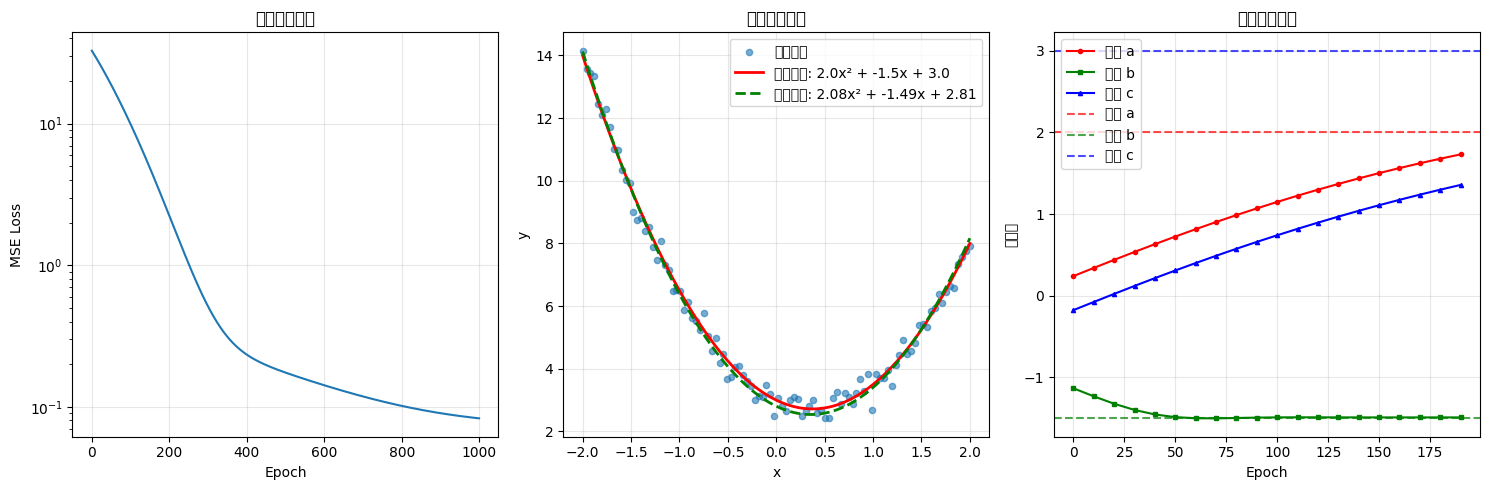

In [5]:
# 可视化训练结果
plt.figure(figsize=(15, 5))

# 子图1：训练损失曲线
plt.subplot(1, 3, 1)
plt.plot(loss_history)
plt.title('训练损失曲线')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.grid(True, alpha=0.3)

# 子图2：拟合结果对比
plt.subplot(1, 3, 2)
x_plot = x.reshape(-1)
with torch.no_grad():
    y_pred = model(X).numpy().reshape(-1)

plt.scatter(x_plot, y, alpha=0.6, label='原始数据', s=20)
plt.plot(x_plot, true_a * x_plot**2 + true_b * x_plot + true_c, 'r-', 
         linewidth=2, label=f'真实函数: {true_a}x² + {true_b}x + {true_c}')
plt.plot(x_plot, y_pred, 'g--', linewidth=2, 
         label=f'预测函数: {final_a:.2f}x² + {final_b:.2f}x + {final_c:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('拟合结果对比')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图3：参数收敛过程
plt.subplot(1, 3, 3)
param_history_a = []
param_history_b = []
param_history_c = []

# 重新训练以记录参数变化（可选，这里简化显示）
temp_model = QuadraticRegression()
temp_optimizer = torch.optim.Adam(temp_model.parameters(), lr=0.01)

for epoch in range(200):  # 减少epoch数以便快速演示
    predictions = temp_model(X)
    loss = criterion(predictions, Y)
    temp_optimizer.zero_grad()
    loss.backward()
    temp_optimizer.step()
    
    if epoch % 10 == 0:
        a, b, c = temp_model.get_params()
        param_history_a.append(a)
        param_history_b.append(b)
        param_history_c.append(c)

epochs_recorded = list(range(0, 200, 10))
plt.plot(epochs_recorded, param_history_a, 'r-', label='参数 a', marker='o', markersize=3)
plt.plot(epochs_recorded, param_history_b, 'g-', label='参数 b', marker='s', markersize=3)
plt.plot(epochs_recorded, param_history_c, 'b-', label='参数 c', marker='^', markersize=3)
plt.axhline(y=true_a, color='r', linestyle='--', alpha=0.7, label='真实 a')
plt.axhline(y=true_b, color='g', linestyle='--', alpha=0.7, label='真实 b')
plt.axhline(y=true_c, color='b', linestyle='--', alpha=0.7, label='真实 c')
plt.xlabel('Epoch')
plt.ylabel('参数值')
plt.title('参数收敛过程')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# 模型评估
with torch.no_grad():
    predictions = model(X)
    mse = criterion(predictions, Y).item()
    rmse = np.sqrt(mse)
    
    # 计算R²分数
    y_mean = torch.mean(Y)
    ss_tot = torch.sum((Y - y_mean) ** 2)
    ss_res = torch.sum((Y - predictions) ** 2)
    r2_score = 1 - (ss_res / ss_tot)

print("=== 模型评估结果 ===")
print(f"均方误差 (MSE): {mse:.6f}")
print(f"均方根误差 (RMSE): {rmse:.6f}")
print(f"R² 得分: {r2_score.item():.6f}")

# 在新数据上进行预测
print("\n=== 预测示例 ===")
test_points = torch.tensor([[-1.5], [0.0], [1.5]], dtype=torch.float32)
with torch.no_grad():
    test_predictions = model(test_points)

for i, (x_val, pred) in enumerate(zip(test_points.numpy(), test_predictions.numpy())):
    true_val = true_a * x_val**2 + true_b * x_val + true_c
    print(f"x = {x_val[0]:.1f}: 预测值 = {pred[0]:.3f}, 真实值 = {true_val[0]:.3f}, 误差 = {abs(pred[0] - true_val[0]):.3f}")

# 保存模型（可选）
torch.save(model.state_dict(), 'quadratic_regression_model.pth')
print("\n模型已保存为 'quadratic_regression_model.pth'")

=== 模型评估结果 ===
均方误差 (MSE): 0.082782
均方根误差 (RMSE): 0.287719
R² 得分: 0.990896

=== 预测示例 ===
x = -1.5: 预测值 = 9.732, 真实值 = 9.750, 误差 = 0.018
x = 0.0: 预测值 = 2.806, 真实值 = 3.000, 误差 = 0.194
x = 1.5: 预测值 = 5.263, 真实值 = 5.250, 误差 = 0.013

模型已保存为 'quadratic_regression_model.pth'


In [ ]:
# 比较不同优化器的效果
def train_with_optimizer(optimizer_class, lr, name, epochs=500):
    """使用指定优化器训练模型"""
    model_temp = QuadraticRegression()
    optimizer = optimizer_class(model_temp.parameters(), lr=lr)
    loss_hist = []
    
    for epoch in range(epochs):
        predictions = model_temp(X)
        loss = criterion(predictions, Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_hist.append(loss.item())
    
    return model_temp, loss_hist

# 测试不同优化器
optimizers_config = [
    (torch.optim.SGD, 0.1, 'SGD'),
    (torch.optim.Adam, 0.01, 'Adam'),
    (torch.optim.RMSprop, 0.01, 'RMSprop'),
    (torch.optim.Adagrad, 0.1, 'Adagrad')
]

results = {}
plt.figure(figsize=(15, 10))

# 子图1：损失曲线比较
plt.subplot(2, 2, 1)
for optimizer_class, lr, name in optimizers_config:
    model_opt, loss_hist = train_with_optimizer(optimizer_class, lr, name)
    results[name] = (model_opt, loss_hist)
    plt.plot(loss_hist, label=name, linewidth=2)

plt.title('不同优化器的损失曲线比较')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图2：最终参数对比
plt.subplot(2, 2, 2)
param_names = ['a', 'b', 'c']
true_params = [true_a, true_b, true_c]
x_pos = np.arange(len(param_names))

width = 0.15
for i, (name, (model_opt, _)) in enumerate(results.items()):
    a, b, c = model_opt.get_params()
    predicted_params = [a, b, c]
    plt.bar(x_pos + i * width, predicted_params, width, label=name, alpha=0.7)

plt.bar(x_pos + len(results) * width, true_params, width, label='真实值', 
        color='red', alpha=0.8)
plt.xlabel('参数')
plt.ylabel('参数值')
plt.title('不同优化器的最终参数对比')
plt.xticks(x_pos + width * len(results) / 2, param_names)
plt.legend()
plt.grid(True, alpha=0.3)

# 子图3：拟合效果对比
plt.subplot(2, 2, (3, 4))
x_plot = x.reshape(-1)
plt.scatter(x_plot, y, alpha=0.4, label='原始数据', s=15, color='lightgray')
plt.plot(x_plot, true_a * x_plot**2 + true_b * x_plot + true_c, 'k-', 
         linewidth=3, label='真实函数', alpha=0.8)

colors = ['blue', 'red', 'green', 'orange']
for i, (name, (model_opt, _)) in enumerate(results.items()):
    with torch.no_grad():
        y_pred = model_opt(X).numpy().reshape(-1)
    plt.plot(x_plot, y_pred, '--', linewidth=2, color=colors[i], 
             label=f'{name} 拟合', alpha=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('不同优化器的拟合效果对比')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印最终结果对比
print("=== 不同优化器最终结果对比 ===")
print(f"真实参数: a = {true_a:.3f}, b = {true_b:.3f}, c = {true_c:.3f}")
print("-" * 60)
for name, (model_opt, loss_hist) in results.items():
    a, b, c = model_opt.get_params()
    final_loss = loss_hist[-1]
    print(f"{name:>10}: a = {a:6.3f}, b = {b:6.3f}, c = {c:6.3f}, 最终损失 = {final_loss:.6f}")